In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('car_prices.csv')
df.drop('Unnamed: 4',axis = 'columns',inplace = True)

In [3]:
df

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


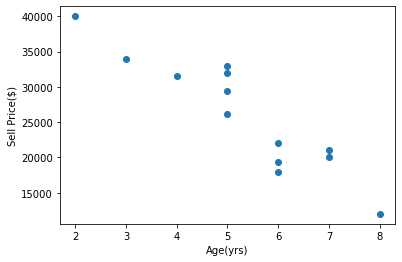

In [4]:
plt.xlabel('Age(yrs)')
plt.ylabel('Sell Price($)')
plt.scatter(df['Age(yrs)'],df['Sell Price($)'])

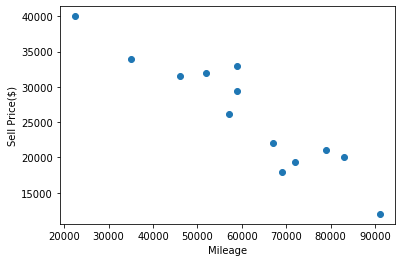

In [5]:
plt.xlabel('Mileage')
plt.ylabel('Sell Price($)')
plt.scatter(df['Mileage'],df['Sell Price($)'])

In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit_transform(df['Car Model'])

array([1, 1, 1, 1, 1, 0, 0, 0, 0, 2, 2, 2, 2])

In [7]:
df1 = df.copy()
df1['Car Model'] = le.fit_transform(df['Car Model'])
df1

,Car Model,Mileage,Sell Price($),Age(yrs)
0,1,69000,18000,6
1,1,35000,34000,3
2,1,57000,26100,5
3,1,22500,40000,2
4,1,46000,31500,4
5,0,59000,29400,5
6,0,52000,32000,5
7,0,72000,19300,6
8,0,91000,12000,8
9,2,67000,22000,6


In [8]:
X = df1[['Car Model','Mileage','Age(yrs)']]
X

,Car Model,Mileage,Age(yrs)
0,1,69000,6
1,1,35000,3
2,1,57000,5
3,1,22500,2
4,1,46000,4
5,0,59000,5
6,0,52000,5
7,0,72000,6
8,0,91000,8
9,2,67000,6


In [9]:
y = df1['Sell Price($)']
y

0     18000
1     34000
2     26100
3     40000
4     31500
5     29400
6     32000
7     19300
8     12000
9     22000
10    20000
11    21000
12    33000
Name: Sell Price($), dtype: int64

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)
X_test 

,Car Model,Mileage,Age(yrs)
10,2,83000,7
7,0,72000,6
1,1,35000,3


In [12]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [13]:
model.predict([[2,45000,4]])

C:\Users\nehah\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([33340.52995533])

In [14]:
model.score(X_test,y_test)

0.8752543236561466